In [9]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ds=pd.read_csv("haberman.csv")
print(ds.shape)
print(ds.columns)


(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


** It has 306 rows with 4 features(age, year, node, status)** 

In [3]:
ds['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

** The dataset has 225 data points where te survival status is 1 & 81 data points where the status was 2.<br>
 225- survived for more than 5 years<br>
 81 - survived less than 5 years**

In [4]:
print(ds.describe())
print(np.percentile(ds['status'],70))

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
1.0


** Avg age of patient is 52.4 years, Avg num of nodes is 4.<br>
 From Percentile values, it can be said that more than 70 % of patients survived for > 5 years**

# 2D Scatter plot

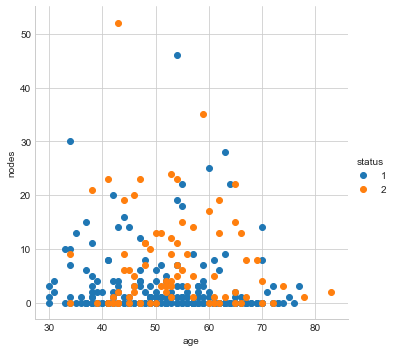

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(ds,hue="status",size=5)\
   .map(plt.scatter,"age","nodes")\
    .add_legend();
plt.show()

* The graph for both categories(status=1 and status=2) are spread across
* Its is difficult to distinguish or form a separation for two categories
* One more observation is that category STATUS=1 (survival > 5 years) are concentrated towards lesser number of nodes when compared to category STATUS=2 (survival < 5 years) which are spread from 0-35 nodes

# Pair-plotting

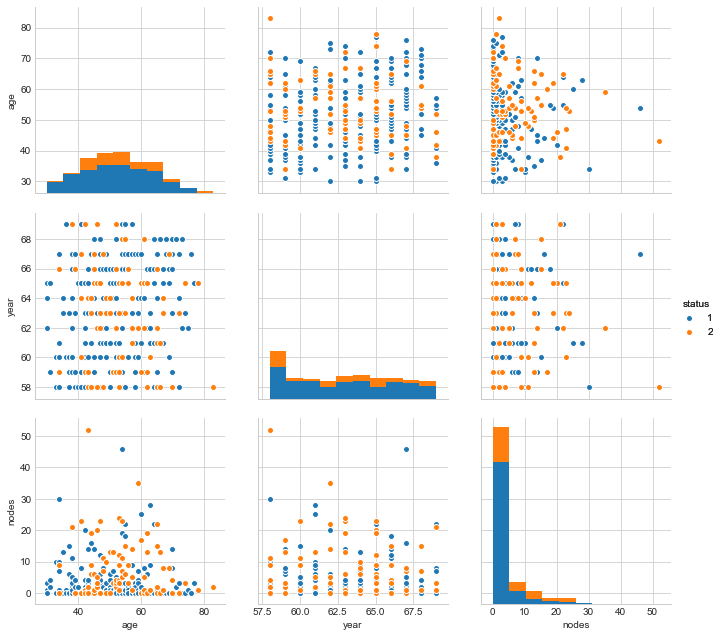

In [6]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(ds,hue="status",size=3,vars=['age','year','nodes']).add_legend()
plt.show()

* Plot - Age vs Year<br>
The data is very scattered and the spread is overlapping. Difficult to make further analysis with these features.
* Plot - Age vs Nodes<br>
The data is overlapping with these feaures too but helps to distinguish slightly better than previous features.
* Plot - Year vs Nodes<br>
It is difficult to distinguish or make any classification with this plot


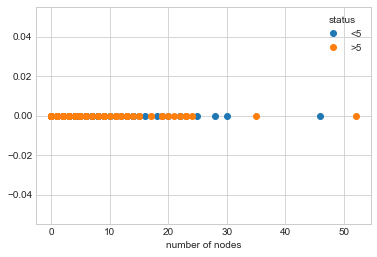

In [7]:
ds_status1=ds.loc[ds["status"]==1]
ds_status2=ds.loc[ds["status"]==2]
plt.plot(ds_status1["nodes"],np.zeros_like(ds_status1["nodes"]),'o',label="<5")
plt.plot(ds_status2["nodes"],np.zeros_like(ds_status2["nodes"]),'o',label=">5")
plt.legend(title="status")
plt.xlabel("number of nodes")
plt.show()


** this graph has overlapping, hence not very helpful to draw conclusion**

# Histogram, PDF, CDF

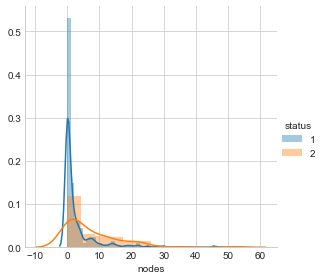

In [10]:
sns.FacetGrid(ds,hue="status",size=4)\
   .map(sns.distplot,"nodes")\
   .add_legend();
plt.show();



** this graph tells us that the probability of patient to survive more than 5 years is greater, if patients has less number of nodes(~2-3)
<br>and patients having more number of nodes, are likely to survive less than 5 years.**

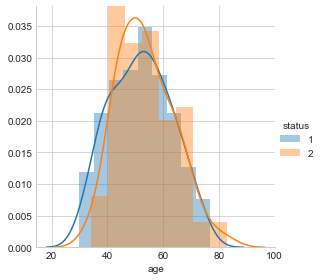

In [11]:
sns.FacetGrid(ds,hue="status",size=4)\
   .map(sns.distplot,"age")\
   .add_legend();
plt.show();


A major part of graph is overlapped.
<br>Some of the conclusions can be 
* Patients betwen the age group 25-40 are morelikely to survive more than 5 years and between 40-60 are more likey to survive lss than 5 years
* for age group beyound 60, this plotting does not help much to draw conclusion on status of patient


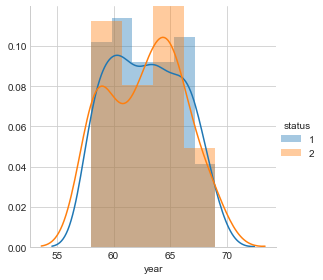

In [12]:
sns.FacetGrid(ds,hue="status",size=4)\
   .map(sns.distplot,"year")\
   .add_legend();
plt.show();


** This data also has overlapping. However it shows there were significantly more successfull operations than unsuccessfull during years 62-63 & 67-68. But information is not very helpful to make further analysis.**

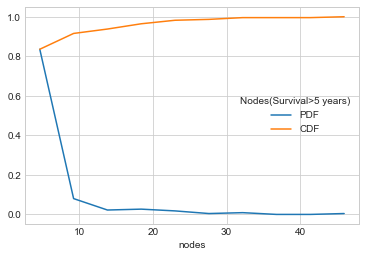

In [13]:
counts,bin_edges=np.histogram(ds_status1["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF")
plt.plot(bin_edges[1:],cdf,label="CDF")
plt.xlabel('nodes')
plt.legend(title="Nodes(Survival>5 years)")
plt.show()

 
* ~82 % of people who had survived >5 years had nodes between ~0-5. So if a patient has less number of nodes,there are chances are that patients will survive >5 years when compared to a patient with more nodes 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


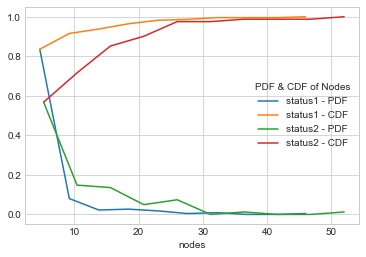

In [15]:
counts,bin_edges=np.histogram(ds_status1["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="status1 - PDF")
plt.plot(bin_edges[1:],cdf,label="status1 - CDF")
#plt.show()
counts,bin_edges=np.histogram(ds_status2["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="status2 - PDF")
plt.plot(bin_edges[1:],cdf,label="status2 - CDF")
plt.legend(title="PDF & CDF of Nodes")
plt.xlabel('nodes')
plt.show()


* 83.55 % Patients who survived more than 5 years,had less than 5(4.6) nodes
* 56.79 % patients who survived less than 5 years had less than 5(5.2)nodes 

# Mean, Variance and Std-dev, Median, Percentile, Quantile, IQR, MAD

In [16]:
print("Mean: (age)")
print(np.mean(ds_status1["age"]))
print(np.mean(ds_status2["age"]))
print("\nMean:(nodes)")
print(np.mean(ds_status1["nodes"]))
print(np.mean(ds_status2["nodes"]))
print("\nStd Dev: (age)")
print(np.std(ds_status1["age"]))
print(np.std(ds_status2["age"]))
print("\nStd Dev:(nodes)")
print(np.std(ds_status1["nodes"]))
print(np.std(ds_status2["nodes"]))
print("\n Quantiles- age")
print(np.percentile(ds_status1["age"],np.arange(0,100,25)))
print(np.percentile(ds_status2["age"],np.arange(0,100,25)))

print("\n Quantiles- nodes")
print(np.percentile(ds_status1["nodes"],np.arange(0,100,25)))
print(np.percentile(ds_status2["nodes"],np.arange(0,100,25)))

print("\n Quantiles- age")
print(np.percentile(ds_status1["age"],90))
print(np.percentile(ds_status2["age"],90))

print("\n Quantiles- nodes")
print(np.percentile(ds_status1["nodes"],90))
print(np.percentile(ds_status2["nodes"],90))

from statsmodels import robust
print("\nMedian ABsolute Deviation- nodes")
print(robust.mad(ds_status1["nodes"]))
print(robust.mad(ds_status2["nodes"]))

print("\nMedian ABsolute Deviation- age")
print(robust.mad(ds_status1["age"]))
print(robust.mad(ds_status2["age"]))

Mean: (age)
52.01777777777778
53.67901234567901

Mean:(nodes)
2.7911111111111113
7.45679012345679

Std Dev: (age)
10.98765547510051
10.10418219303131

Std Dev:(nodes)
5.857258449412131
9.128776076761632

 Quantiles- age
[30. 43. 52. 60.]
[34. 46. 53. 61.]

 Quantiles- nodes
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

 Quantiles- age
67.0
67.0

 Quantiles- nodes
8.0
20.0

Median ABsolute Deviation- nodes
0.0
5.930408874022408

Median ABsolute Deviation- age
13.343419966550417
11.860817748044816


 * The above statistics are comparison of features between patients who >5 years & < 5years respectively.

# Box plot and Whiskers

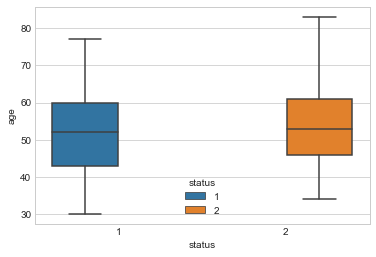

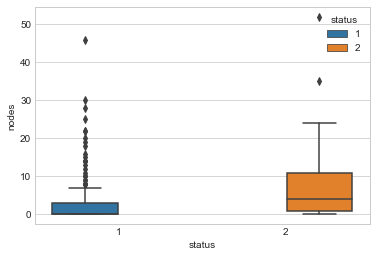

In [17]:
ax=sns.boxplot(x='status',y='age',data=ds,hue="status")
plt.show()
sns.boxplot(x='status',y='nodes',data=ds,hue="status")
plt.show()


* 25% & 50% line is almost same for nodes for patients (surviving more than 5 years ) 
* Percentiles of age for both sets of patients(survival >5 years & survival<5 years) is very close 

# Violin plots

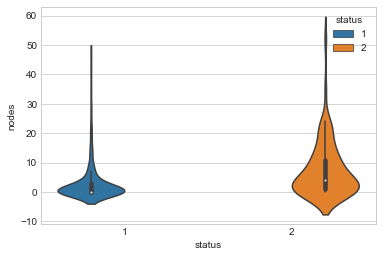

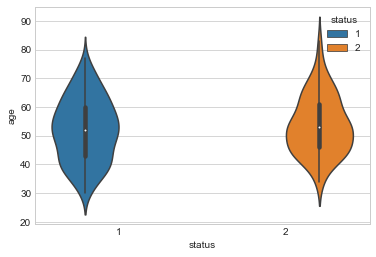

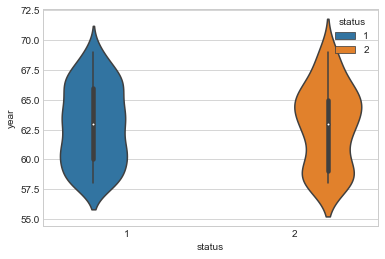

In [18]:
ax=sns.violinplot(x='status',y='nodes',data=ds,size=5,hue="status")
handles, labels = ax.get_legend_handles_labels()
plt.show()
sns.violinplot(x='status',y='age',data=ds,size=5,hue="status")
plt.show()
sns.violinplot(x='status',y='year',data=ds,size=5,hue="status")
plt.show()


* the plot of node vs status gives more clear information, that lesser the number of nodes, more are the chances of survival.
* age, year plot gives information which is more overlappping i.e density across the spread is very similar, not very distinctive which makes it difficult to rely on feature

# Multivariate probability density, contour plot

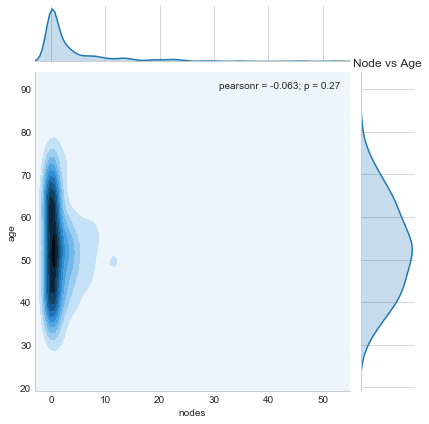

In [26]:
sns.jointplot(x="nodes", y="age", data=ds, kind="kde");
plt.title("Node vs Age")
plt.show();



* Through this plot we can say that number of nodes is bbetween 0-5 majorly in cancer patients and it is majorly in agegroup 40-65 as the density in the graph shows

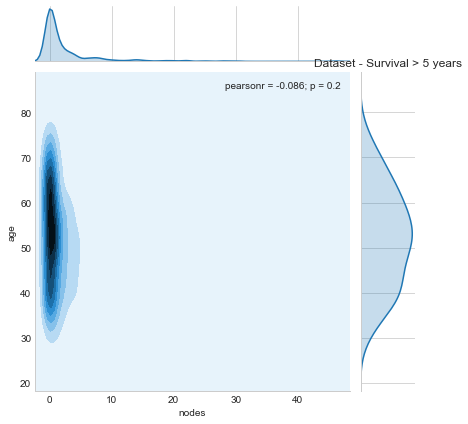

In [27]:
patients_survival_1 = ds[ds['status'] == 1];
patients_survival_2 = ds[ds['status'] == 2];
sns.jointplot(x="nodes", y="age", data=patients_survival_1, kind="kde");
plt.title("Dataset - Survival > 5 years")
plt.show();

* The first graph shows data of patients who **survived more than 5 years**,  majorly belonged to age group 40-50 & had nodes in range ~0-3


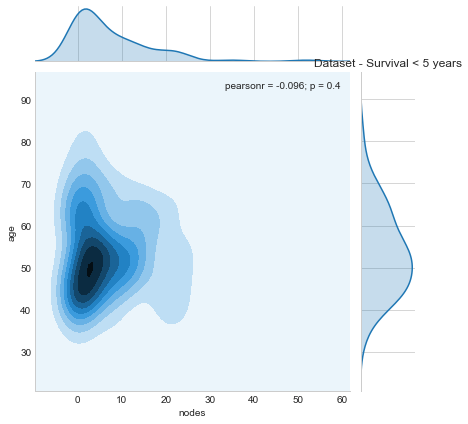

In [28]:

sns.jointplot(x="nodes", y="age", data=patients_survival_2, kind="kde");
plt.title("Dataset - Survival < 5 years")
plt.show();


* The above plotting shows that patients who **survived less than 5 years**, had more number of nodes and density shows their age group between 45-55 years & had nodes in range ~5-8

 # Conclusion
* The data is skewed. It has more records of patients who survived >5years than <5years.
* Survival chances are majorly in relation(inversely proportional) with number of nodes. Lesser the number of nodes, greater the chances of survival.
* Age is also a factor contributing towards patients survival. Cancer patients of age group(25-40) tend to live longer than age group of (>50 years)
* Though the dataset set gives information about these patterns, it is difficult to **clearly distinguish** patients with different survival statuses.


References-<br>
* https://seaborn.pydata.org/generated/seaborn.pairplot.html
* https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-most-simple-manner-possible
